In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as a_s
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import confusion_matrix as cm

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv',encoding= 'latin-1')
data.head()
data.info()
df = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.head()
df['class'] = df['class'].replace({'ham':0,'spam':1})
#df.head()
df.isna().sum()

class      0
message    0
dtype: int64

# cleaning text and preparing procedures for it

In [4]:
def clean_text(text:str)->str:
    """ this function is cleaning the text
    eg. removing unnecessary spaces and digits
    converting all characters into lower capes
    returning a string of clean text"""
    text = str(text)
    text = text.lower()
    text = text.strip()
    text = text.replace(',','')
    text = text.replace('.','')
    text = re.sub('\d+',' ',text)
    text = re.sub('\d+',' ',text)
    text = re.sub(' \s+',' ',text)
    return text
    

In [5]:
df.message = df.message.apply(clean_text)
y = np.array(df['class'])

# using countvector

In [6]:
cv = CountVectorizer()
X = cv.fit_transform(np.array(df.message))
#print(X)
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size =0.33,random_state = 42)

# fitting the model with MultinomialNB

In [7]:
model_ = MultinomialNB()
model_.fit(train_x,train_y)
#test_x = test_x.reshape(-1,1)

MultinomialNB()

In [8]:
# accuracy  and confusion matrix

accuracy score is : 0.9733550842849374


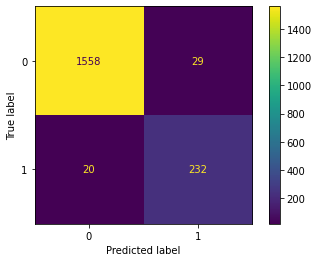

In [9]:
pred = model_.predict(test_x)
print('accuracy score is :',a_s(test_y,pred))

cmd(cm(test_y,pred)).plot()


# now we ready to check wether a mail is spam or not

In [11]:
new_mail = str(input('Enter Message : '))
#print(cv.transform([new_mail]))
ans = model_.predict(cv.transform([new_mail]))
if ans == 1:
    print('Spam')
    
else:
    
    print('Not Spam')

Enter Message :  hii, sumit


Not Spam
